In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("HousingData.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


In [5]:
important_features = ["RM", "LSTAT", "PTRATIO", "TAX", "DIS"]
X = df[important_features]
y = df["MEDV"]

In [6]:
X = X.fillna(X.mean())
y = y.fillna(y.mean())

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Linear output layer
])

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=16, verbose=1)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 576.7788 - mae: 22.2084 - val_loss: 487.2250 - val_mae: 20.2766
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 533.4872 - mae: 20.9760 - val_loss: 419.2277 - val_mae: 18.5676
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 448.3917 - mae: 19.2652 - val_loss: 301.7574 - val_mae: 15.4980
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 295.8037 - mae: 15.4889 - val_loss: 163.8652 - val_mae: 11.2916
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 128.6421 - mae: 9.7659 - val_loss: 75.9389 - val_mae: 7.2696
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 56.0922 - mae: 6.0585 - val_loss: 50.3048 - val_mae: 5.5003
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 44.7073 - mae: 5.1818 - val_loss: 42.1229 - val_mae: 4.8803
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 33.4255 - mae: 4.4066 - val_loss: 36.8089 - val_mae: 4.4618
Epoch 9/100
26/26 ━━━━━

In [13]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test MAE: {test_mae:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.8254 - mae: 2.1289
Test MAE: 2.32


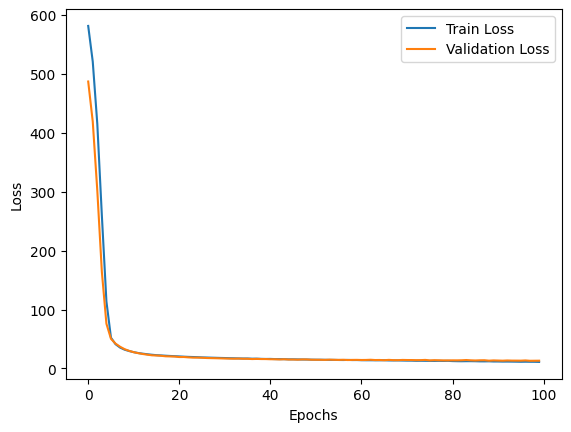

In [14]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {test_mse:.2f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Test MSE: 13.12


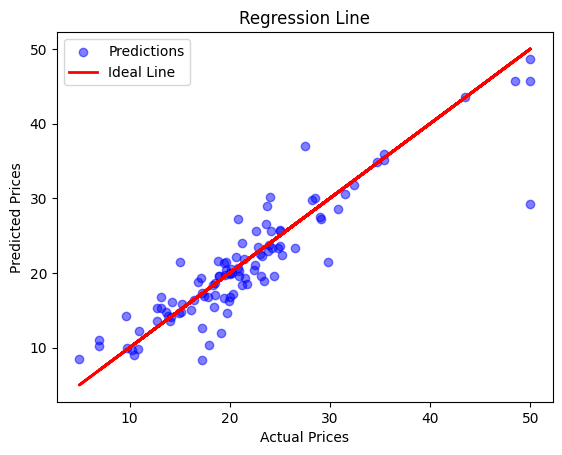

In [16]:

plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predictions')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Regression Line')

plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict house prices
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Squared Error (MSE): 13.12
Mean Absolute Error (MAE): 2.32
R² Score: 0.82
